(Computacion_Basica)=
# <span style="color:#F72585"><center>Computación Bayesiana Básica</center></span>

En esta lección aprenderemos conceptos básicos de programación probabilística usando Python. Para familiarizarse con el lenguaje, vaya a los cuadernos de JupyterLab sobre Python.

El siguiente código carga las librerías que se usaran en esta lección. Este código por lo general deb cargarse para hacer los cálculos Bayesianos haciendo uso de Python. Pronto abriremos Stan, Pyro y TensorFlow Probability.

In [3]:
# importando librearias
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#import seaborn as sns

## <span style="color:#4361EE">Distribución Binomial</span>

Por la forma como hemos descrito la forma de obtención de los datos y si se ha supuesto que el globo se pincharía exactamente $n$ veces, entonces la probabilidad de obtener $w$ veces agua esta dada por 

$$P(w| \mu, n) \equiv   \binom{n}{w} \mu^w(1-\mu)^{n-w} = \frac{n!}{(n-w)!w!} \mu^w(1-\mu)^{n-w}=Binomial(w;n,\mu) $$

El siguiente código genera el gráfico de la distribución Binomial para distintos valores de los parámetros. Recuerde siempre correr el código anterior, si va a comenzar su sesión. ¡¡Disfrútelo!!

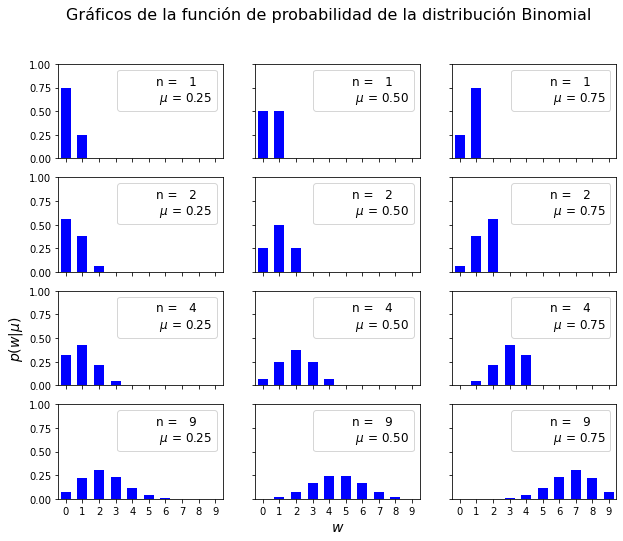

In [1]:
# gráficos de la distribución Binomial
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

n_params = [1, 2, 4, 9]
mu_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params)+1)
n_row = len(n_params)
n_col = len(mu_params)
fig, ax = plt.subplots(n_row, n_col, sharex = True, sharey = True, figsize=(10,8))
for i in range(4):
    for j in range(3):
        n  = n_params[i]
        mu = mu_params[j]
        w  = stats.binom(n=n, p=mu).pmf(x)
        ax[i,j].vlines(x,0,w,colors='b', lw=10)
        ax[i,j].set_ylim(0,1)
        ax[i,j].plot(0,0, label = "n = {:3n}\n $\\mu$ = {:3.2f}".format(n,mu), alpha=0 )
        ax[i,j].legend(fontsize=12)
ax[3,1].set_xlabel('$w$', fontsize = 14)
ax[2,0].set_ylabel('$p(w|\\mu)$',fontsize=14)
ax[0,0].set_xticks(x)
fig.suptitle('Gráficos de la función de probabilidad de la distribución Binomial',fontsize=16)
plt.show()

## <span style="color:#4361EE">Distribución Beta</span>

La función de densidad de probabilidad (fdp) de la distribución Beta con parámetros $\alpha$ y $\beta$ es dada por

$$ Beta(x;\alpha,\beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{Beta(\alpha,\beta)},$$



con $x \in [0,1]$, $\alpha>0$, $\beta>0$ y $Beta(\alpha,\beta)= \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ , en donde $\Gamma$ es la función Gama. 

El siguiente código genera el gráfico de la distribución Beta para distintos valores de los parámetros. 

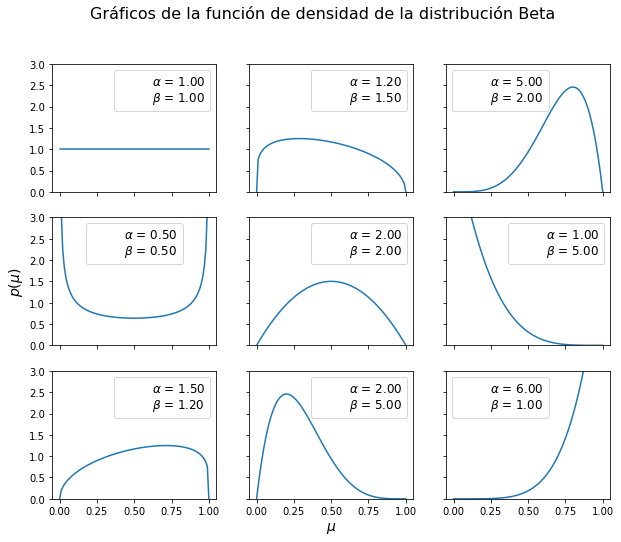

In [2]:
alpha_params = [1.0, 0.5, 1.5, 1.2, 2.0, 2.0, 5.0, 1.0, 6.0]
beta_params  = [1.0, 0.5, 1.2, 1.5, 2.0, 5.0, 2.0, 5.0, 1.0]


idx = np.arange(9)

row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
x = np.linspace(0,1,100)

fig, ax = plt.subplots(3, 3,sharex = True, sharey = True, figsize=(10,8))
for i in idx:
    alpha = alpha_params[i]
    beta  = beta_params[i]
    y = stats.beta(alpha,beta).pdf(x)
    ax[col[i],row[i]].set_ylim(0,3)
    ax[col[i],row[i]].plot(x,y)
    ax[col[i],row[i]].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(alpha, beta), alpha=0)
    ax[col[i],row[i]].legend(fontsize=12)
ax[2,1].set_xlabel('$\\mu$', fontsize=14)
ax[1,0].set_ylabel('$p(\\mu)$', fontsize=14)
fig.suptitle('Gráficos de la función de densidad de la distribución Beta',fontsize=16)
plt.show()
    

## <span style="color:#4361EE">Distribución Posterior</span>

Dado que la densidad a priori para $\mu$ es dada por 

$$ p(\mu) \propto  \mu^{\alpha-1} (1-\mu)^{\beta-1},$$

y el modelo de las observaciones es binomial, se tiene que

$$ p(\omega|\mu) \propto  \mu^{\omega} (1-\mu)^{n-\omega},$$

por lo que usando el teorema de Bayes, se tiene que la posterior es dada por

$$ p(\mu|\omega) = \frac{p(\omega|\mu)p(\mu)}{p(\omega)} \propto \mu^{\omega} (1-\mu)^{n-\omega} \mu^{\alpha-1} (1-\mu)^{\beta-1}.$$

En consecuencia se tiene que

$$ p(\mu|\omega) \propto \mu^{\omega+ \alpha-1} (1-\mu)^{n-\omega + \beta -1}.$$

Pero este es el kernel de una distribución $\text{Beta}(\omega+ \alpha,n-\omega+ \beta)$.

Asi hemos comprobado en esta lección que con una priori $\text{Beta}(\alpha,\beta)$ para el parámetro $\mu$, una verosimilitud (modelos de las observaciones) $p(\omega|\mu)= \text{Binomial}(\mu,n,\omega)$, entonces la posterior para $\mu$ es $\text{Beta}(\omega+\alpha,n-\omega+\beta)$.

Asumamos una a priori $p(\mu)= Beta(\mu;1.5,1.2)$. Si $N=10$ y $w=6$, la distribcion posterior es $p(\mu|w)= Beta(\mu; 6 + 1.5, 10-6 + 1.2)= Beta(\mu;7.5,5.2)$.

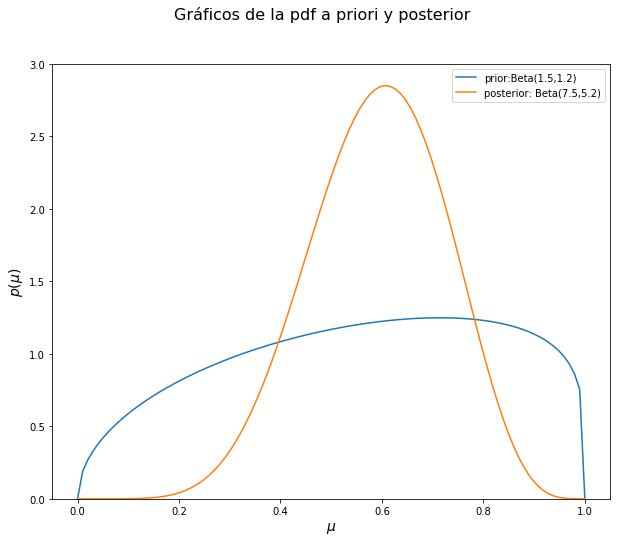

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# parameters of the distributions
alpha_params =[1.5, 7.5]
beta_params = [1.2, 5.2]

# x values to the plot
x = np.linspace(0,1,100)

fig, ax = fig, ax = plt.subplots(figsize=(10,8))
# delimit y axis
ax.set_ylim(0,3)

# prior parameters
alpha = alpha_params[0]
beta  = beta_params[0]

# compute y values to prior plot
y = stats.beta(alpha,beta).pdf(x)

# plot the prior
ax.plot(x,y,label = 'prior:Beta(1.5,1.2)')

# Posterior parameters
alpha = alpha_params[1]
beta  = beta_params[1]

# compute y values to prior plot
y = stats.beta(alpha,beta).pdf(x)

# plot the posterior
ax.plot(x,y,label = 'posterior: Beta(7.5,5.2)')
ax.set_xlabel('$\\mu$', fontsize=14)
ax.set_ylabel('$p(\\mu)$', fontsize=14)
fig.suptitle('Gráficos de la pdf a priori y posterior',fontsize=16)
ax.legend()
plt.show()
    


**Figura 2.3** pdf de las distribuciones a priori y posterior en el problema de lección anterior

## <span style="color:#4361EE">La máquina Bayesiana en acción</span>

Ahora vamos a utilizar al máquina Bayesiana para hacer las inferencias sobre el parámetro $\mu$.

La maquina Bayesiana entrega una distribución posterior. Usaremos este objeto para nuestros cálculos.

### <span style="color:#4CC9F0">Valores más plausibles</span>


Como la distribución posterior describe valores posibles del parámetro y su correspondiente distribución, el estadístico puede 
usar los siguientes criterios para seleccionar los valores más plausibles.

1. La moda de la distribución posterior: MAP.
2. La mediana de la distribución posterior: MEAP.
3. La media (esperanza) a posterior: EAP.


### <span style="color:#4CC9F0">La moda posterior</span>


El siguiente código permite calcular la MAP de la distribución $Beta(7.5, 4.2)$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import minimize_scalar as minimize

def f(t,alpha,beta):
    return  -stats.beta(alpha,beta).pdf(t)

lower = 1e-3
upper = 1  - 1e-3 
mode_f = minimize(f, bounds =(lower,upper),args=( 7.5,5.2), method='bounded' )
#scipy.optimize.minimize_scalar(fun=f, bracket=None, bounds=None, args=(), method='brent', tol=None, options=None)[source]

In [8]:
mode_f

     fun: -2.8505156362159894
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.607477735745656

Luego MAP = 0.607477735745656.

Por otro lado, dado que $\alpha, \beta >1$, podemos usar la formula

$$MAP = \frac{\alpha-1}{\alpha+\beta-2}=  0.6074766355140188$$


### <span style="color:#4CC9F0">Mediana Posterior</span>


De nuevo como como $\alpha,\beta >1$,  podemos usar la aproximación

$$MEAP \approx \frac{\alpha- \tfrac{1}{3}}{\alpha + \beta-\tfrac{2}{3}}=0.5955678670360111$$

Por otro lado, si usamos la implementación de la densidad en Python, la mediana es el quantil 50. Luego, el sighiente código
calcula de manera muy precisa la mediana posterior.

In [9]:
MEAP = stats.beta(alpha,beta).ppf(0.5)
MEAP
# o también
stats.beta(alpha,beta).median()

0.5954464513255184

### <span style="color:#4CC9F0">Esperanza Posterior</span>


La media exacta es dada por
$$EAP = \frac{\alpha}{\alpha+\beta}=0.5905511811023623$$
Usando la implementación de Python obtenemos

In [10]:
EAP = stats.beta(alpha,beta).mean()
EAP

0.5905511811023623

In [11]:
# Intervalos de credibilidad
i_cred_80 = stats.beta(alpha,beta).ppf((0.1,0.9))
i_cred_95 = stats.beta(alpha,beta).ppf((0.025,0.975))
print(i_cred_80,"\n",i_cred_95)

[0.41302139 0.76127185] 
 [0.32190863 0.83223348]


## <span style="color:#4361EE">Monte Carlo</span>


En esta sección  usaremos una muestra de la distribución posterior de tamaño N = 5000

In [12]:
N=5000
sample = stats.beta(alpha,beta).rvs(size=N)

In [13]:
np.shape(sample)

(5000,)

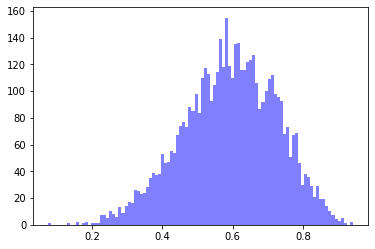

In [14]:
# histogram
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 100
n, bins, patches = plt.hist(sample, num_bins, facecolor='blue', alpha=0.5)
plt.show()


In [15]:
# statistics
stats.describe(sample)

DescribeResult(nobs=5000, minmax=(0.0763212293235686, 0.9420531683924104), mean=0.5925446697225457, variance=0.017553896482287216, skewness=-0.24115741519169007, kurtosis=-0.2405704376843305)

In [16]:
# quantiles
stats.mstats.hdquantiles(sample, prob=[0.025,.1,0.25, 0.5, 0.75,.9, 0.975])

masked_array(data=[0.31899043, 0.41473388, 0.50437517, 0.59724324,
                   0.69096375, 0.760677  , 0.83344362],
             mask=False,
       fill_value=1e+20)

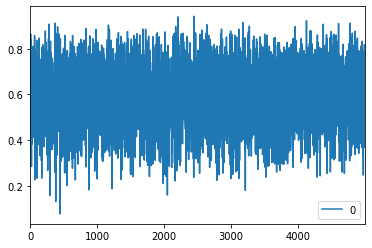

In [17]:
# show the sample as a time series
import pandas as pd
df = pd.DataFrame(data=sample)
df.plot()